In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
from matplotlib import ticker

In [2]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("max_columns", 100)

In [3]:
combined = pd.read_csv("data/combined.csv")
a_names = pd.read_csv("data/a_names.csv")
e_names = pd.read_csv("data/e_names.csv")

## Preprocessing Data - Combined Data ##

In [4]:
y = combined['callback']
X = combined.drop(['callback'], axis=1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [6]:
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Testing Data  - Penalized Logistic Regression ##

In [155]:
from sklearn.linear_model import LogisticRegression
logreg_scaled = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))

print("Mean Cross Validation, SKFold: {:.2f}".format(np.mean(cross_val_score(logreg_scaled, 
                                                                             X_train_scaled, 
                                                                             y_train, 
                                                                             cv=skfold,
                                                                            scoring = 'accuracy'))))


logreg_scaled_coef = pd.DataFrame(data=logreg_scaled.coef_, 
                                  columns=X.columns, 
                                  index=['Penalized Scaled Logistic Regression Coefficients'])


c2 = [logreg_scaled_coef]
coefs = pd.concat(c2)
coefs.T.sort_values(by = 'Penalized Scaled Logistic Regression Coefficients', ascending=False)

PENALIZED LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.90
Test set score: 0.90
Mean Cross Validation, SKFold: 0.90


,Penalized Scaled Logistic Regression Coefficients
canada,0.203675
skillspeaking,0.194904
female,0.108621
language_skills,0.088352
exp_highquality,0.086479
british,0.071342
greek,0.031067
certificate,0.029092
ma,0.013253
indian,0.000000


<AxesSubplot:title={'center':'Feature Importance (Logistic Regression)'}>

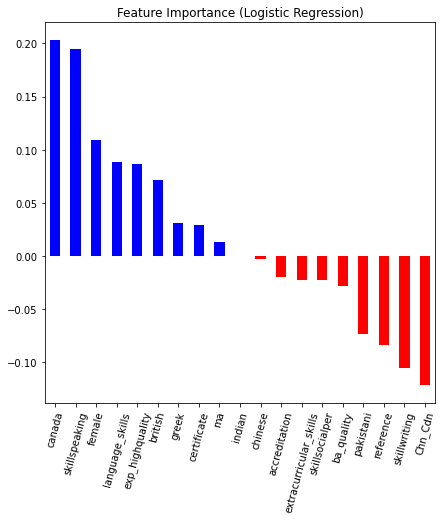

In [227]:
graph = coefs.T.sort_values(by = 'Penalized Scaled Logistic Regression Coefficients', ascending=False)
graph['Penalized Scaled Logistic Regression Coefficients'].plot.bar(
    title = 'Feature Importance (Logistic Regression)',
    legend = False, 
    figsize = (7,7),
    rot = 75,
    color=(graph['Penalized Scaled Logistic Regression Coefficients'] > 0).map({True: 'b', False: 'red'}))

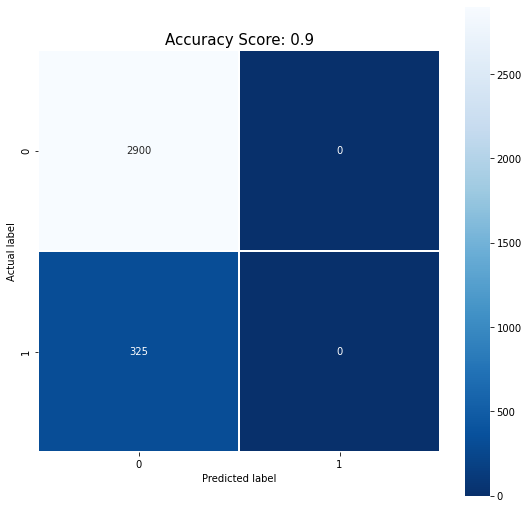

In [78]:
y_pred = logreg_scaled.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
score = (logreg_scaled.score(X_test_scaled, y_test))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 2))
plt.title(all_sample_title, size = 15);

In [57]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95      2900
     class 1       0.00      0.00      0.00       325

    accuracy                           0.90      3225
   macro avg       0.45      0.50      0.47      3225
weighted avg       0.81      0.90      0.85      3225



/Users/andrewlai/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Testing Data - Random Forest  ##

In [59]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=200)
rforest.fit(X_train_scaled,y_train)
ypred = rforest.predict(X_test_scaled)
print(metrics.classification_report(ypred, y_test))

In [226]:
print("RANDOM FORESST (SCALED DATA)")
print("Training set score: {:.2f}".format(rforest.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(rforest.score(X_test_scaled, y_test)))

print("Mean Cross Validation, SKFold: {:.2f}".format(np.mean(cross_val_score(rforest, 
                                                                             X_train_scaled, 
                                                                             y_train, 
                                                                             cv=skfold,
                                                                            scoring = 'accuracy'))))

rforest_feature = pd.DataFrame(data=rforest.feature_importances_).T
rforest_feature.columns = X.columns
rforest_feature.index=['Random Forest Features']


rforest_feature.T.sort_values(by = 'Random Forest Features', ascending=False)

RANDOM FORESST (SCALED DATA)
Training set score: 0.95
Test set score: 0.88
Mean Cross Validation, SKFold: 0.88


,Random Forest Features
skillspeaking,0.137848
skillwriting,0.127966
skillsocialper,0.125474
extracurricular_skills,0.090034
ba_quality,0.090014
female,0.071937
exp_highquality,0.071268
language_skills,0.070023
ma,0.061961
indian,0.023882


<AxesSubplot:title={'center':'Feature Importance (Random Forest)'}>

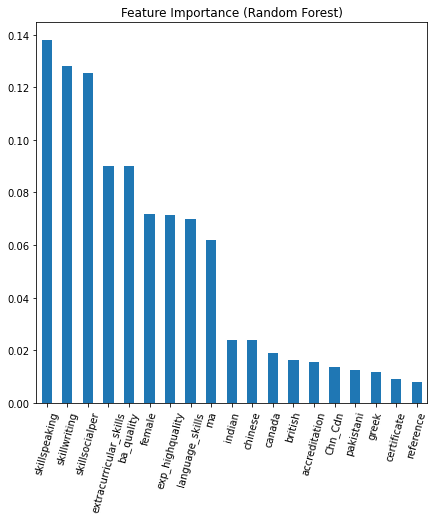

In [233]:
rf_graph = rforest_feature.T.sort_values(by = 'Random Forest Features', ascending=False)
rf_graph['Random Forest Features'].plot.bar(
    title = 'Feature Importance (Random Forest)',
    legend = False, 
    figsize = (7,7),
    rot = 75)

In [63]:
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      3126
         1.0       0.05      0.16      0.08        99

    accuracy                           0.88      3225
   macro avg       0.51      0.53      0.51      3225
weighted avg       0.94      0.88      0.91      3225



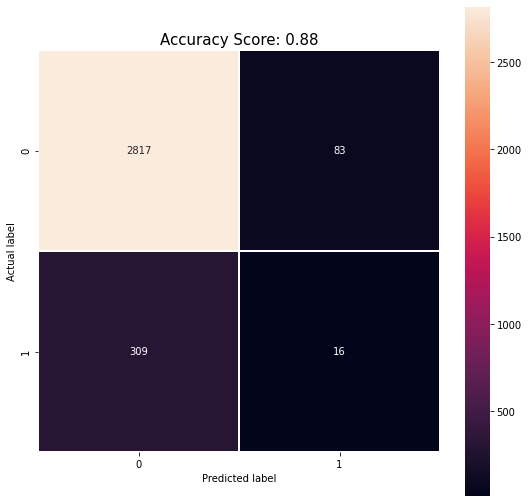

In [80]:
rf_mat = metrics.confusion_matrix(y_test, ypred)
plt.figure(figsize=(9,9))
score = (rforest.score(X_test_scaled, y_test))
sns.heatmap(rf_mat, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 2))
plt.title(all_sample_title, size = 15);